<a href="https://colab.research.google.com/github/Praxis-QR/PythonForManagers/blob/main/Appendix_eCommerce_Version_21_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](http://1.bp.blogspot.com/-nqAGzznZQNo/UwS8rxjfXeI/AAAAAAAABTA/nunmRLowpps/s1600/PraxisLogo.gif)<br>
http://www.praxis.ac.in
<hr>

[Prithwis Mukerjee](http://www.yantrajaal.com)<br>

#Exploratory Data Analysis <br>
[Admond Lee article](https://towardsdatascience.com/exploratory-data-analysis-on-e-commerce-data-be24c72b32b2) <br>
[full data set](https://www.kaggle.com/carrie1/ecommerce-data)

#Setup, Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
#warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
#import pandas_profiling

#import gc
#import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

#Fetch Data

In [3]:
# Original Data https://www.kaggle.com/carrie1/ecommerce-data
# Same data in Google Drive https://drive.google.com/open?id=1K_rQftggePnII3K6613MumhKo3dTMO5r
# 10% data in Google Drive https://drive.google.com/file/d/1YjCMPc4vUuXvWik1u4p5aP-THJUJjvDX/view?usp=sharing
#!wget -O eCommerce.csv 'https://drive.google.com/uc?export=download&id=1K_rQftggePnII3K6613MumhKo3dTMO5r'       # full data
#!wget -O eCommerce02.csv 'https://drive.google.com/uc?export=download&id=1YjCMPc4vUuXvWik1u4p5aP-THJUJjvDX'      # 10% data
!wget -O eCommerce.csv 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/eCommerce.csv'       # full data
!wget -O eCommerce02.csv 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/eCommerce02.csv'      # 10% data

--2021-12-17 02:52:07--  https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/eCommerce.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Praxis-QR/PythonForManagers/main/Data/eCommerce.csv [following]
--2021-12-17 02:52:07--  https://raw.githubusercontent.com/Praxis-QR/PythonForManagers/main/Data/eCommerce.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45038728 (43M) [text/plain]
Saving to: ‘eCommerce.csv’

eCommerce.csv       100%[===================>]  42.95M   168MB/s    in 0.3s    

2021-12-17 02:52:08 (168 MB/s) - ‘eCommerce.csv’ saved [45038728/45038728]

--2021-12-17 02:52

In [4]:
# specify encoding to deal with different formats
df = pd.read_csv('eCommerce.csv', encoding = 'ISO-8859-1')
#df = pd.read_csv('eCommerce02.csv', encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
#note some columns have data missing
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [6]:
# change the column names, in case you need to 
#df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
df.rename(columns={'InvoiceNo': 'invoice_num',
                    'StockCode' : 'stock_code',
                    'Description' : 'description',
                    'Quantity' : 'quantity',
                    'InvoiceDate' : 'invoice_date',
                    'UnitPrice' : 'unit_price',
                    'CustomerID' : 'cust_id',
                    'Country' : 'country'}, 
          inplace=True)
#check new names
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Looking for Null Values

In [8]:
# check missing values for each column 
df.isnull()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [9]:
#How many ? Where ?
df.isnull().sum()
#df.isnull().sum().sort_values(ascending=False)

invoice_num          0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
cust_id         135080
country              0
dtype: int64

### Locating the rows that have null values

In [10]:
#rows where customer id is null
#pd.isnull(df["cust_id"])
df.isnull()['cust_id']

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: cust_id, Length: 541909, dtype: bool

In [11]:
df.isnull()[['cust_id','description']]

,cust_id,description
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
541904,False,False
541905,False,False
541906,False,False
541907,False,False


In [12]:
#df.isnull().any(axis=0)   # what does axis mean
df.isnull().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [13]:
#how many rows have null values
df[df.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135080 entries, 622 to 541540
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   135080 non-null  object 
 1   stock_code    135080 non-null  object 
 2   description   133626 non-null  object 
 3   quantity      135080 non-null  int64  
 4   invoice_date  135080 non-null  object 
 5   unit_price    135080 non-null  float64
 6   cust_id       0 non-null       float64
 7   country       135080 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 9.3+ MB


In [14]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


### Drop the rows with missing values

In [15]:
# df_new without missing values
df = df.dropna()
#Check no missing values left
df.isnull().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   406829 non-null  object 
 1   stock_code    406829 non-null  object 
 2   description   406829 non-null  object 
 3   quantity      406829 non-null  int64  
 4   invoice_date  406829 non-null  object 
 5   unit_price    406829 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


## Change the date format

In [17]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [18]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##Change discription to lowercase

In [19]:
# change description - UPPER case to LOWER case
df['description'] = df.description.str.lower()
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# check missing values for each column 
#df_new.isnull().sum().sort_values(ascending=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [21]:
# change columns tyoe - float to int 
df['cust_id'] = df['cust_id'].astype('int64')
#df.info()
# change columns tyoe - int to string 
df['cust_id'] = df['cust_id'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  object        
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [22]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


##Remove negative quantities

In [24]:
# note junk data - quantity is negative! -- these are possibly returns
df.describe().round(2)

,quantity,unit_price
count,406829.00,406829.00
mean,12.06,3.46
std,248.69,69.32
min,-80995.00,0.00
25%,2.00,1.25
50%,5.00,1.95
75%,12.00,3.75
max,80995.00,38970.00


In [25]:
df = df[df.quantity > 0]
df.describe().round(2)

,quantity,unit_price
count,397924.00,397924.00
mean,13.02,3.12
std,180.42,22.10
min,1.00,0.00
25%,2.00,1.25
50%,6.00,1.95
75%,12.00,3.75
max,80995.00,8142.75


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   397924 non-null  object        
 1   stock_code    397924 non-null  object        
 2   description   397924 non-null  object        
 3   quantity      397924 non-null  int64         
 4   invoice_date  397924 non-null  datetime64[ns]
 5   unit_price    397924 non-null  float64       
 6   cust_id       397924 non-null  object        
 7   country       397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


##Add  new columns

In [27]:
# add new column
df['amount_spent'] = df['quantity'] * df['unit_price']

In [28]:
# rearrange all the columns for easy reference
df = df[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

In [29]:
# Add Month Day Hour
df.insert(loc=2, column='year_month', value=df['invoice_date'].map(lambda x: 100*x.year + x.month))
df.insert(loc=3, column='month', value=df.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df.insert(loc=4, column='day', value=(df.invoice_date.dt.dayofweek)+1)
df.insert(loc=5, column='hour', value=df.invoice_date.dt.hour)

In [30]:
df.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


#Exploratory Data Analysis

In [31]:
#df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()
df.groupby(by=['cust_id','country'],as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


In [32]:
#How many orders
df_orders = df.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()
df_orders.head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


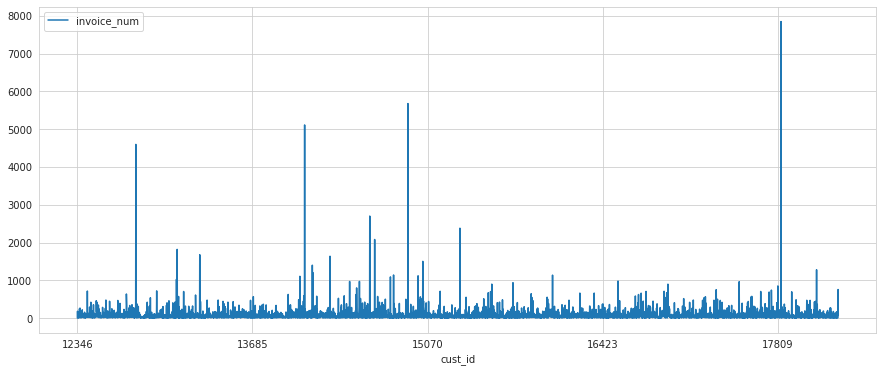

In [33]:
# Quick plot
#
df_orders.plot(x = 'cust_id',y= 'invoice_num', figsize=(15, 6),)
#
# more detailed
#plt.subplots(figsize=(15,6))
#plt.plot(df_orders.cust_id, df_orders.invoice_num)
#plt.xlabel('Customers ID')
#plt.ylabel('Number of Orders')
#plt.title('Number of Orders for different Customers')
#plt.show()

In [34]:
print('The TOP 5 customers with most number of orders...')
df_orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


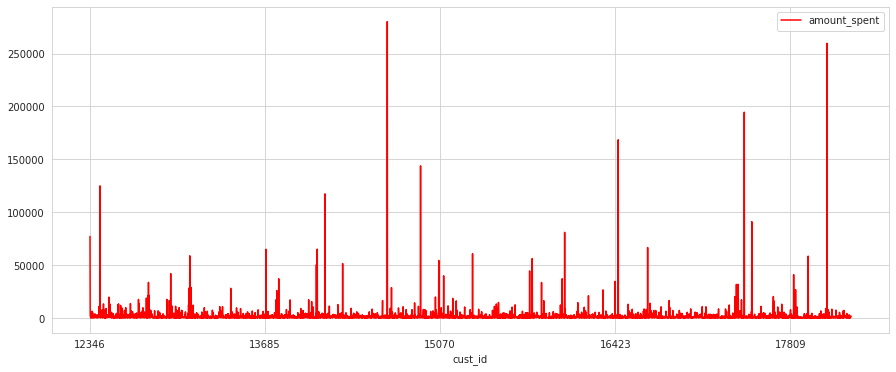

In [35]:
df_money_spent = df.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()
# Quick plot
#
df_money_spent.plot(x = 'cust_id',y= 'amount_spent', figsize=(15, 6), color='red')
#

#plt.subplots(figsize=(15,6))
#plt.plot(df_money_spent.cust_id, df_money_spent.amount_spent)
#plt.xlabel('Customers ID')
#plt.ylabel('Money spent (Dollar)')
#plt.title('Money Spent for different Customers')
#plt.show()

In [36]:
print('The TOP 5 customers with highest money spent...')
df_money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


#Patterns

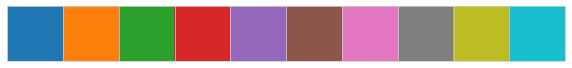

In [37]:
# color available
sns.palplot(color)

In [38]:
df.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


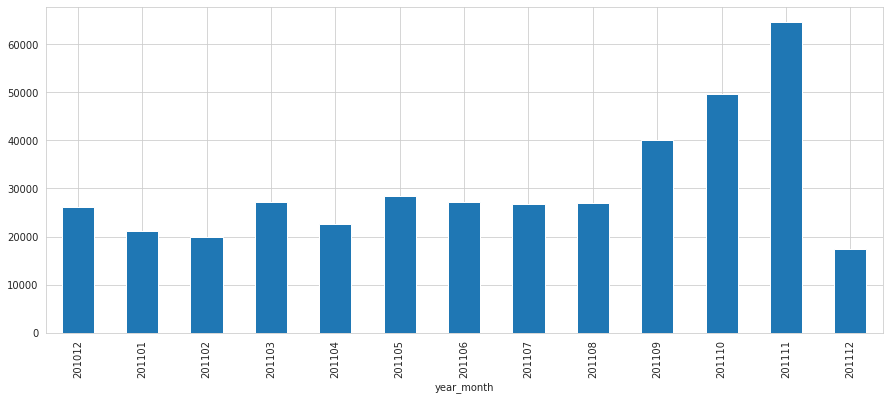

In [39]:
#Orders by month
df.groupby(by=['year_month'])['invoice_num'].count().plot(kind='bar',figsize=(15,6),color=color[0])

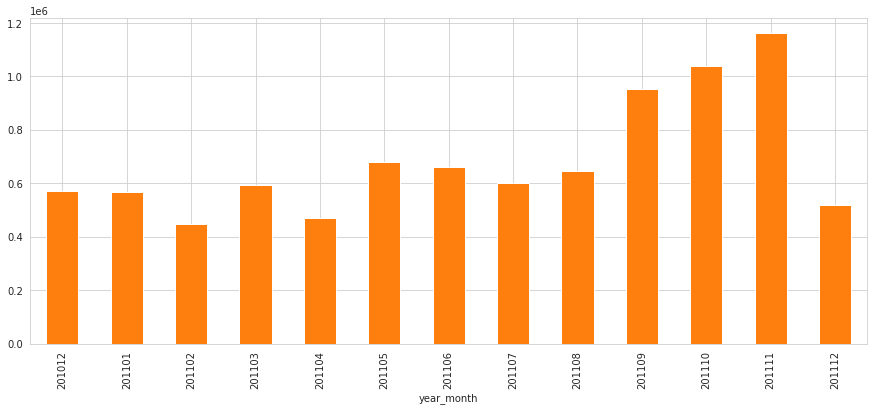

In [40]:
# Value of orders by month
df.groupby(by=['year_month'])['amount_spent'].sum().plot(kind='bar',figsize=(15,6),color=color[1])

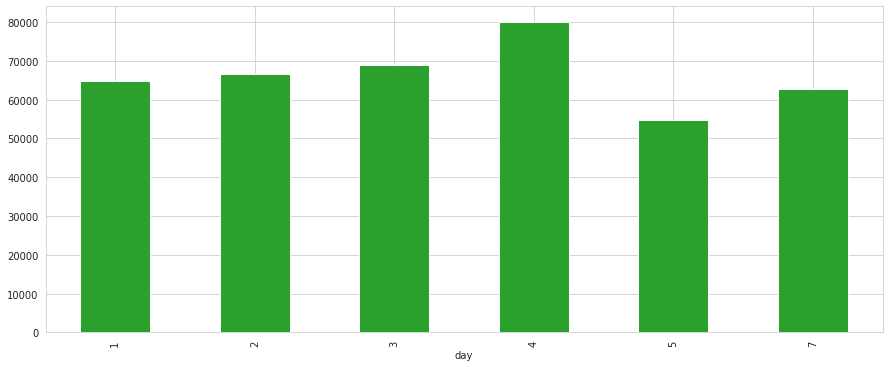

In [41]:
#Orders by Day of Week
ordersByDay = df.groupby(by=['day'])['invoice_num'].count()
ordersByDay.plot(kind='bar',figsize=(15,6),color=color[2])

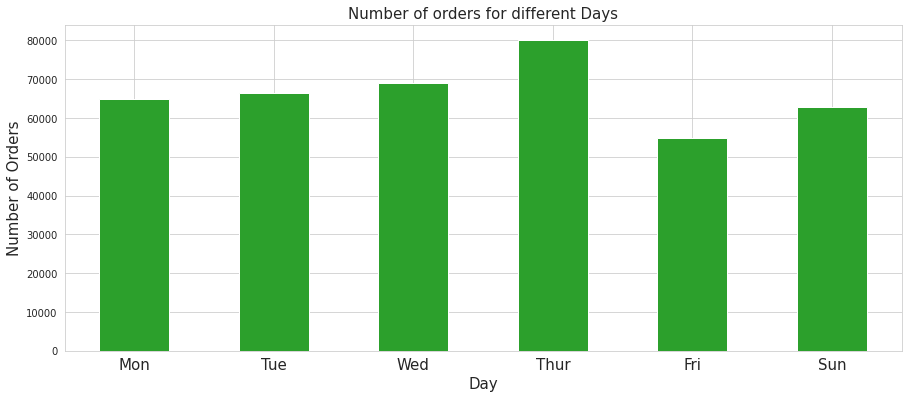

In [42]:
ax = ordersByDay.plot(kind='bar',figsize=(15,6),color=color[2])
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

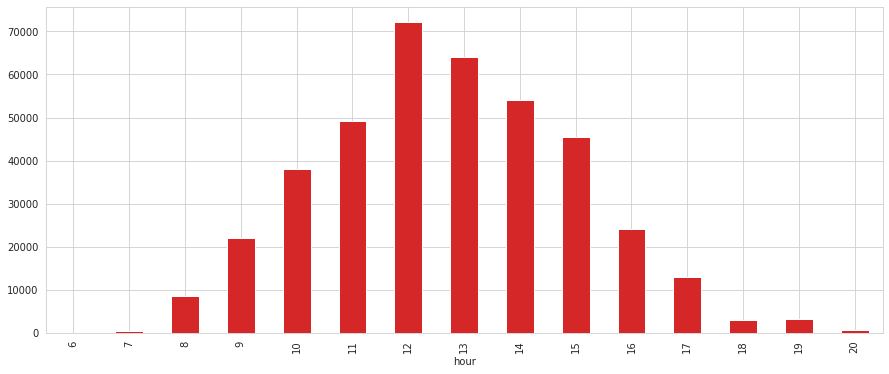

In [43]:
#Orders by Hour of Day
ordersByHour = df.groupby(by=['hour'])['invoice_num'].count()
ordersByHour.plot(kind='bar',figsize=(15,6),color=color[3])

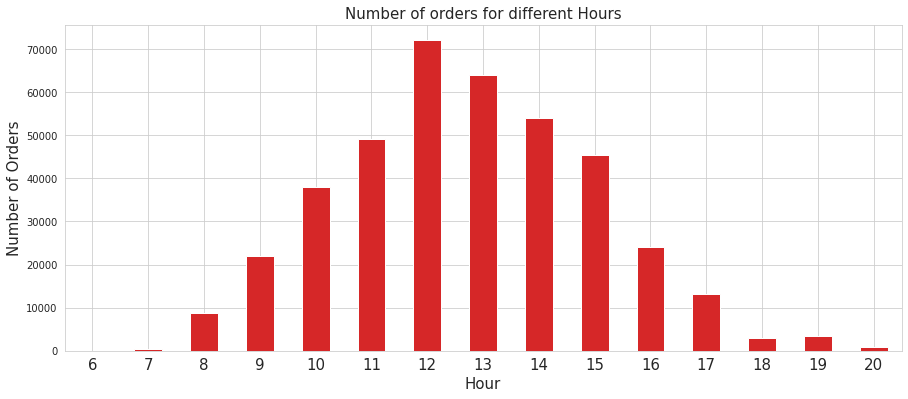

In [44]:
ax = ordersByHour.plot(kind='bar',figsize=(15,6),color=color[3])
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

In [45]:
# Unit price
df.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

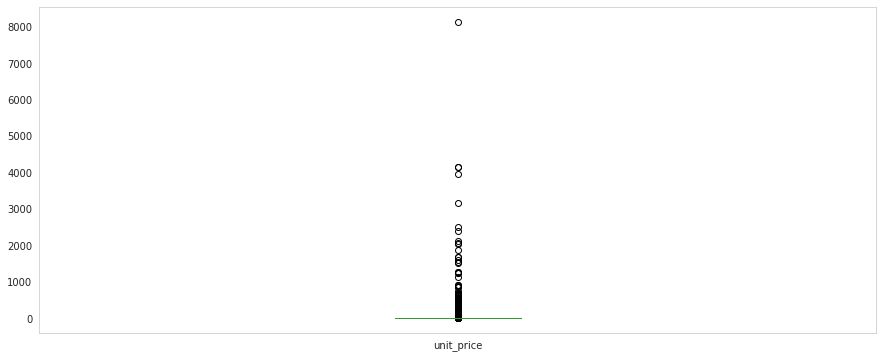

In [46]:
#df.boxplot(by ='day', column =['total_bill'], grid = False)
df.boxplot(column =['unit_price'], grid = False,figsize=(15,6))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


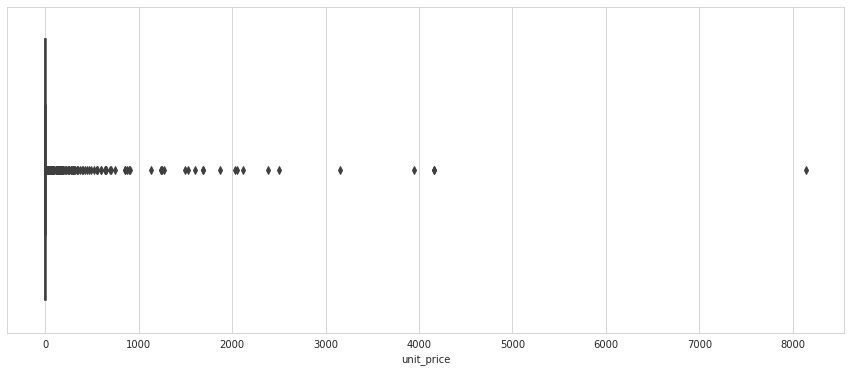

In [47]:
# check the distribution of unit price
plt.subplots(figsize=(15,6))
sns.boxplot(df.unit_price)
plt.show()

In [48]:
df_free = df[df.unit_price == 0]
df_free.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom


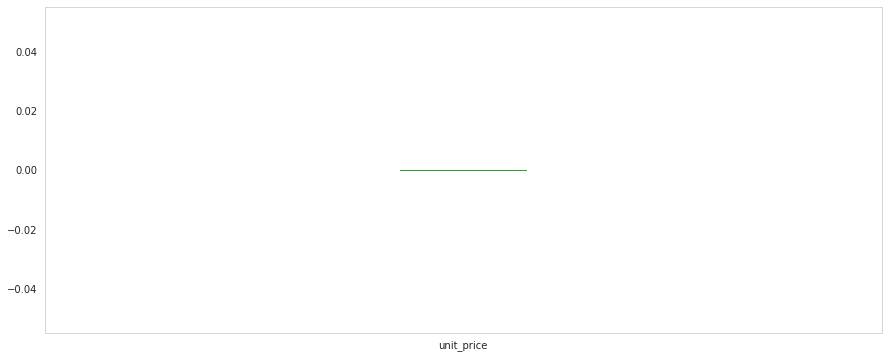

In [49]:
df_free.boxplot(column =['unit_price'], grid = False,figsize=(15,6))

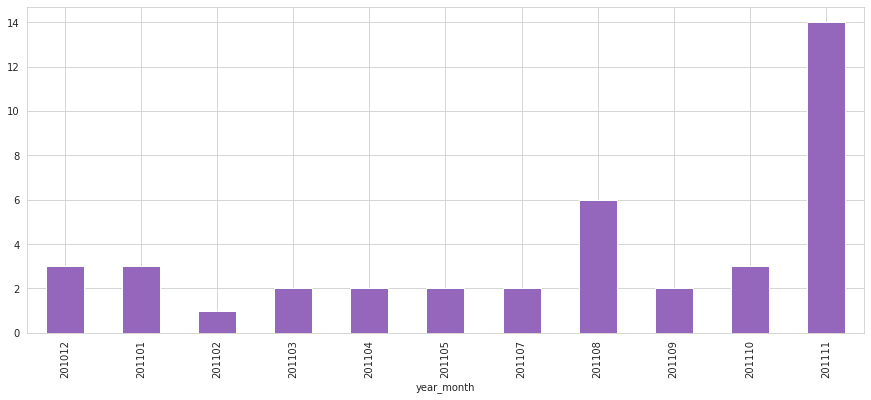

In [50]:
#Free Orders by month
freeOrderByMonth = df_free.groupby(by=['year_month'])['invoice_num'].count()
freeOrderByMonth.plot(kind='bar',figsize=(15,6),color=color[4])

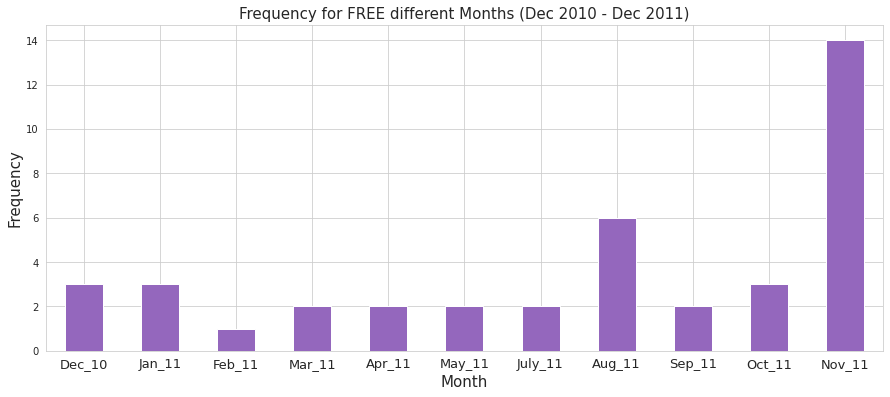

In [51]:
ax = freeOrderByMonth.plot(kind='bar',figsize=(15,6),color=color[4])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for FREE different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

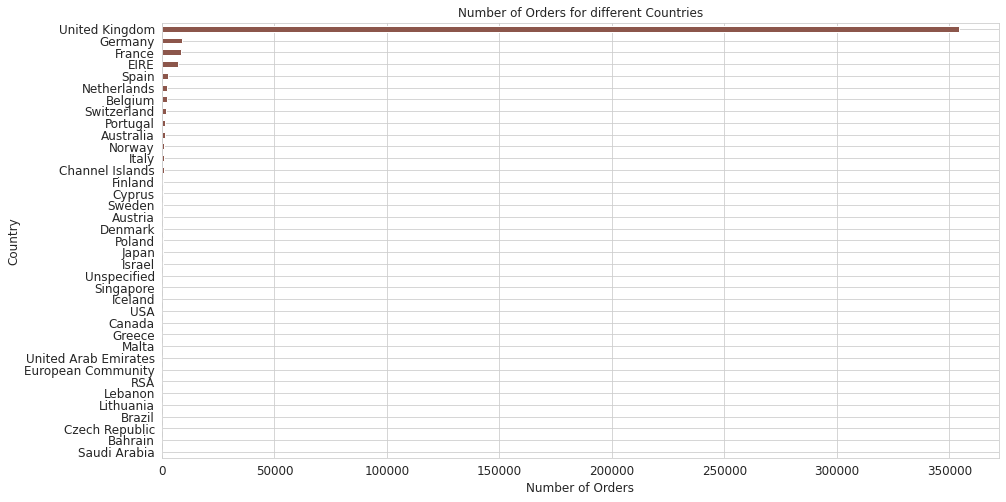

In [52]:
# By Country
group_country_orders = df.groupby(by=['country'])['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
#plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[5],figsize=(15,8))
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

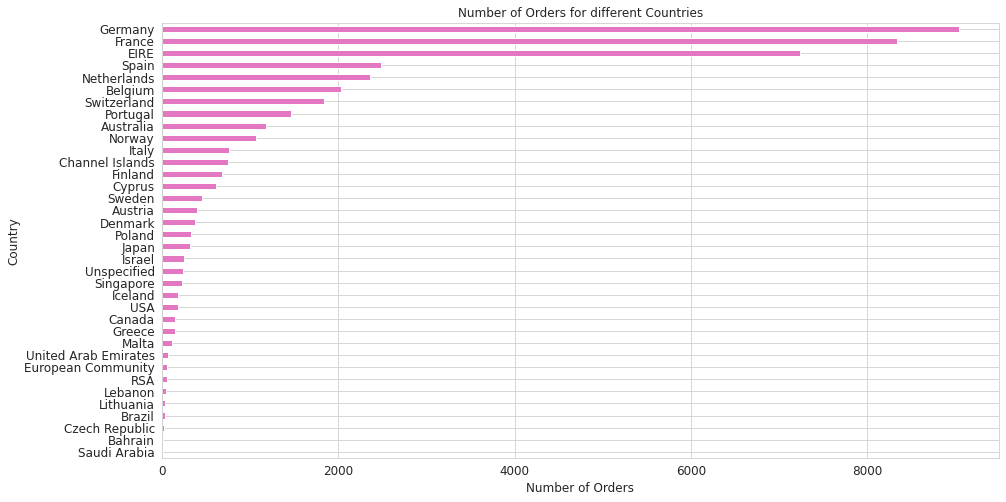

In [53]:
group_country_orders = df.groupby(by=['country'])['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
#plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[6],figsize=(15,8))
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

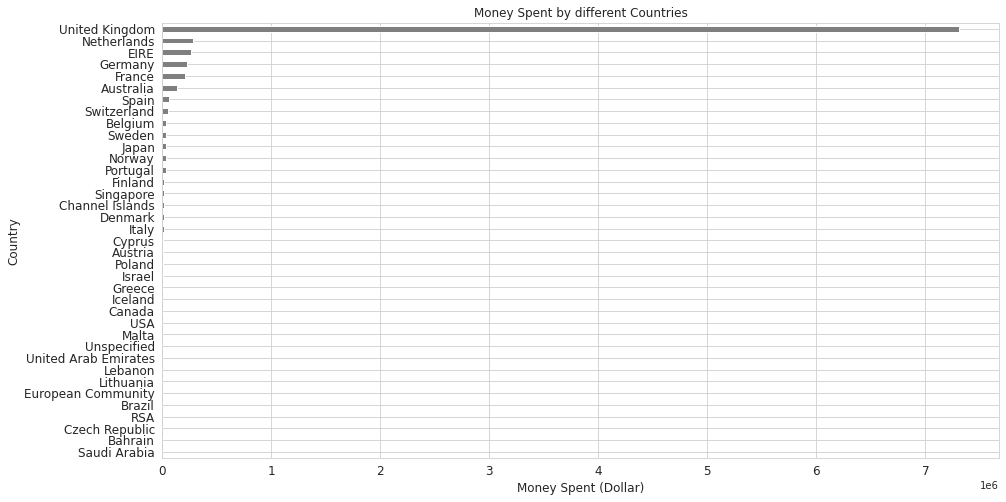

In [54]:
group_country_amount_spent = df.groupby(by=['country'])['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
#plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[7],figsize=(15,8))
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

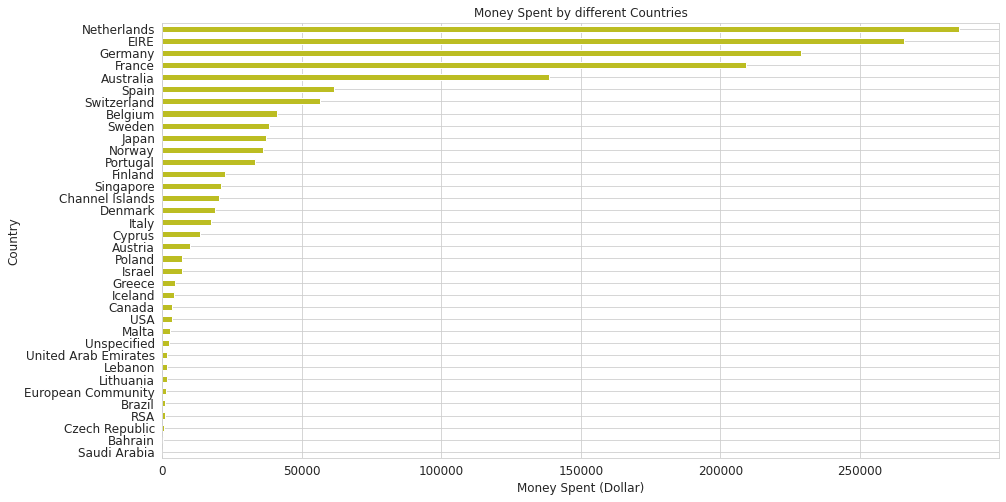

In [55]:
group_country_amount_spent = df.groupby(by=['country'])['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
#plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[8],figsize=(15,8))
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

#Chronobooks <br>
![alt text](https://1.bp.blogspot.com/-lTiYBkU2qbU/X1er__fvnkI/AAAAAAAAjtE/GhDR3OEGJr4NG43fZPodrQD5kbxtnKebgCLcBGAsYHQ/s600/Footer2020-600x200.png)<hr>
Chronotantra and Chronoyantra are two science fiction novels that explore the collapse of human civilisation on Earth and then its rebirth and reincarnation both on Earth as well as on the distant worlds of Mars, Titan and Enceladus. But is it the human civilisation that is being reborn? Or is it some other sentience that is revealing itself. 
If you have an interest in AI and found this material useful, you may consider buying these novels, in paperback or kindle, from [http://bit.ly/chronobooks](http://bit.ly/chronobooks)